In [1]:
#importing all the necessary packages 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error

In [2]:
#importing all the packages for plots and other statistics
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\meena\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Reading csv files-training and test datasets
data = pd.read_csv("bitcoin_price_Training - Training.csv")
#print(data.head(5))
#print(data.tail(5))
#data.dtypes
#data.info()
#data.describe()
data = pd.read_csv("bitcoin_price_Training - Training.csv",index_col= 'Date')
#print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index)
#print(data.index)
#data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null object
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(3)
memory usage: 85.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
#sorting data based on dates
data = data.sort_index()
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


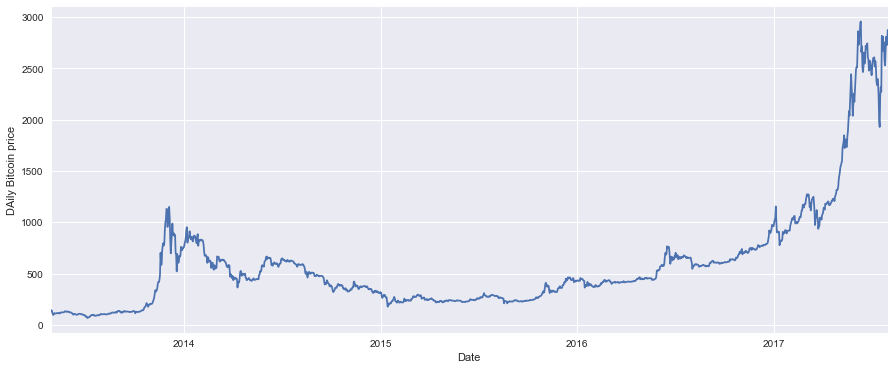

In [6]:
#Predicting closing price of bitcoin
data['Close'].plot()
plt.ylabel("Daily Bitcoin price")

In [7]:
data = data['Close']


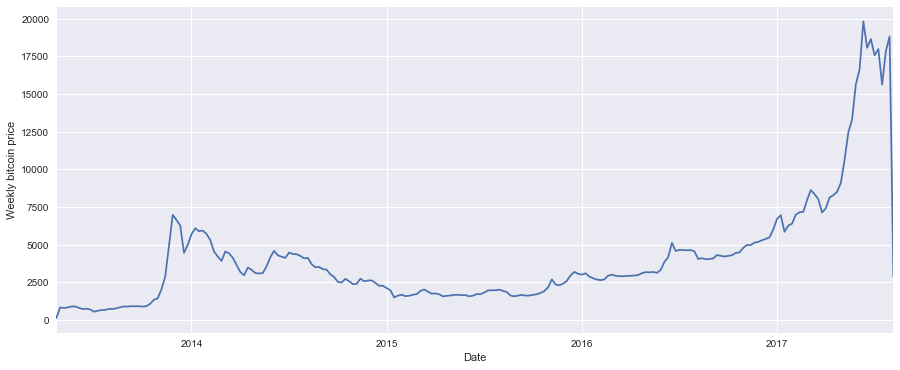

In [8]:
#weekly plot
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

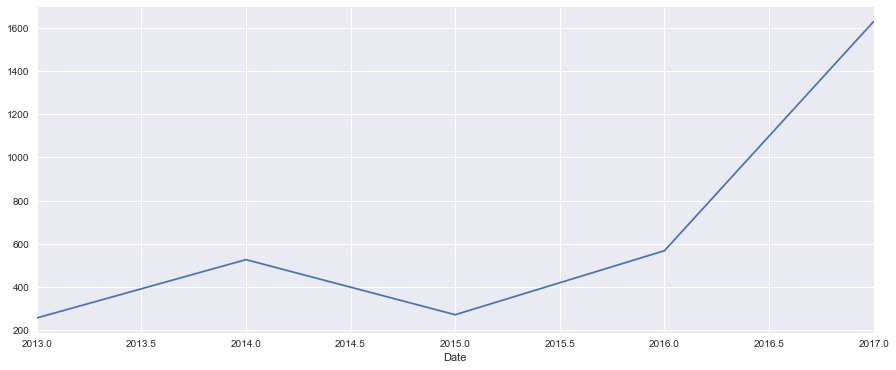

In [9]:
#grouping by year
by_year = data.groupby(data.index.year).mean()
by_year.plot()

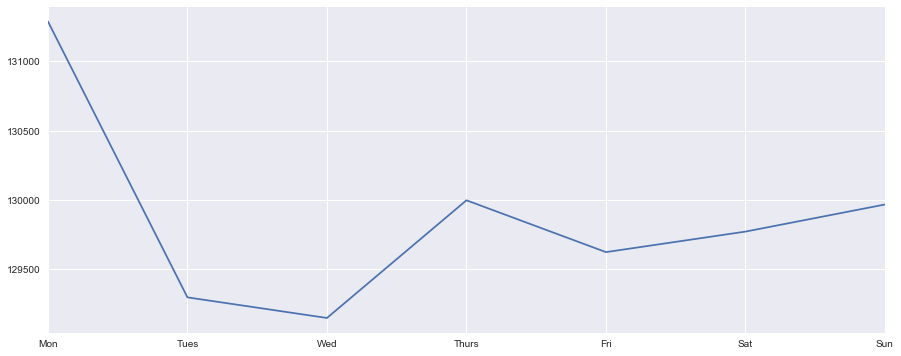

In [10]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

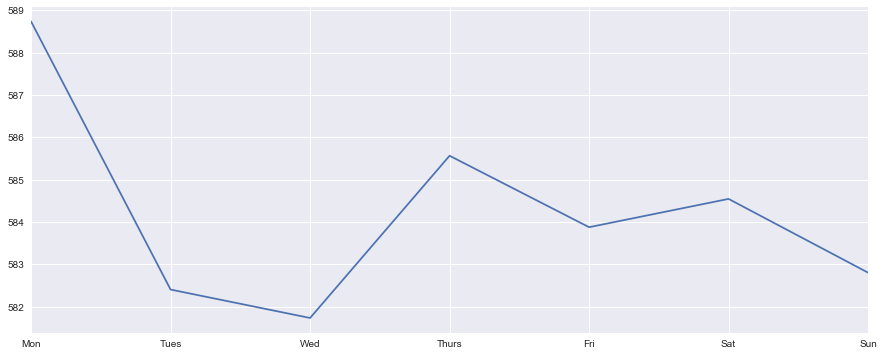

In [11]:
#weekdays from the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

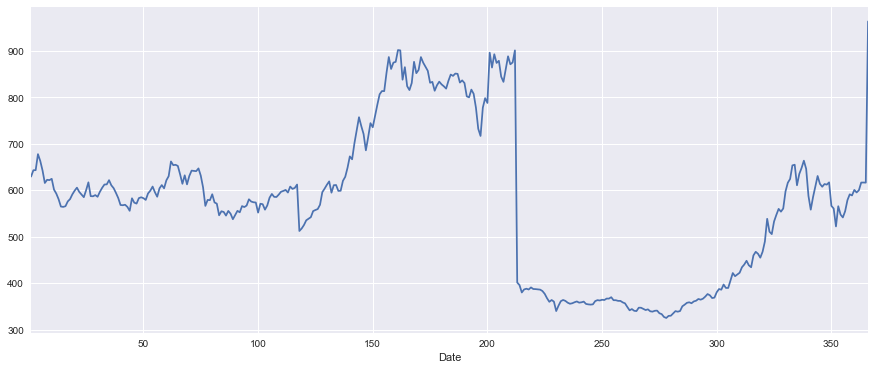

In [12]:
#group by day
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

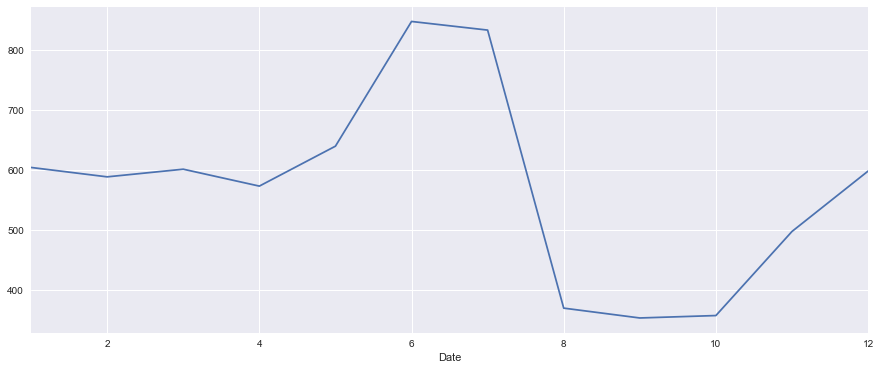

In [13]:
#group by month
by_month = data.groupby(data.index.month).mean()
by_month.plot()

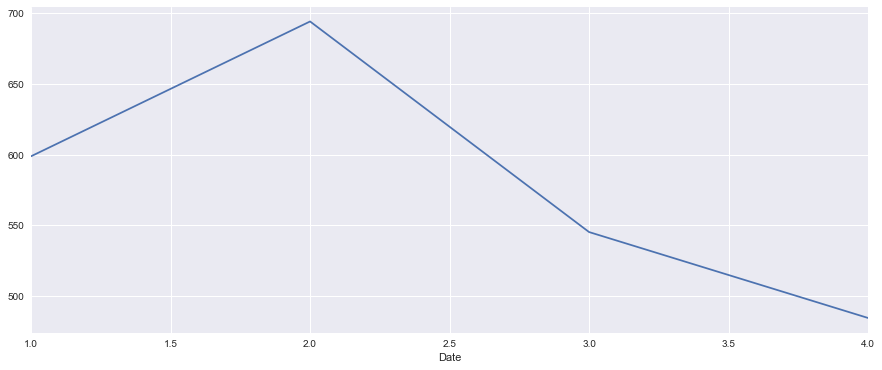

In [14]:
#group by quarter
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    Axes(0.125,0.2;0.775x0.68)
2    Axes(0.125,0.2;0.775x0.68)
3    Axes(0.125,0.2;0.775x0.68)
4    Axes(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

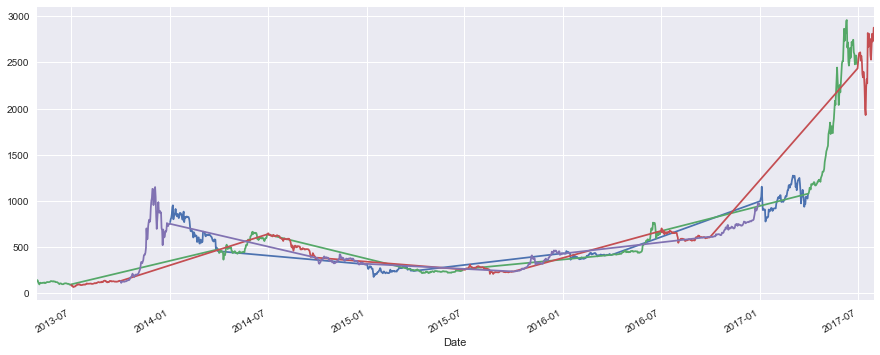

In [15]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

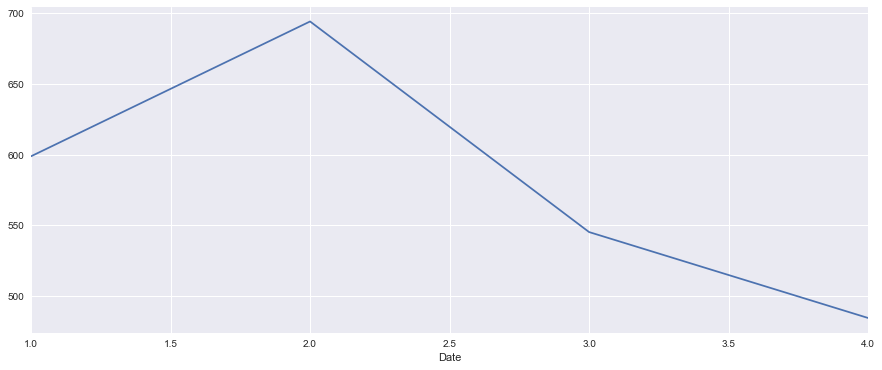

In [16]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

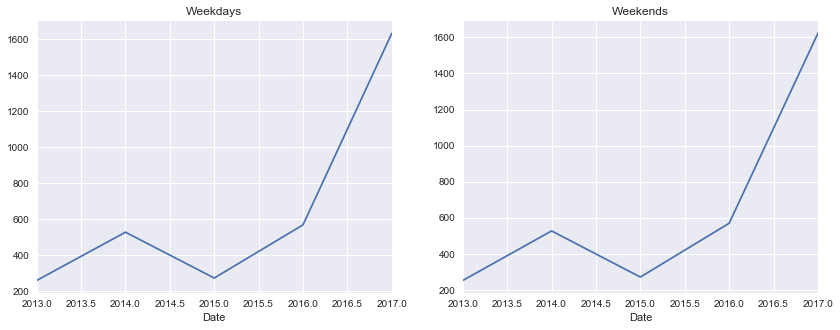

In [17]:
#grouping by weekday and weekend
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')

In [18]:
#data to time series 
ts = data

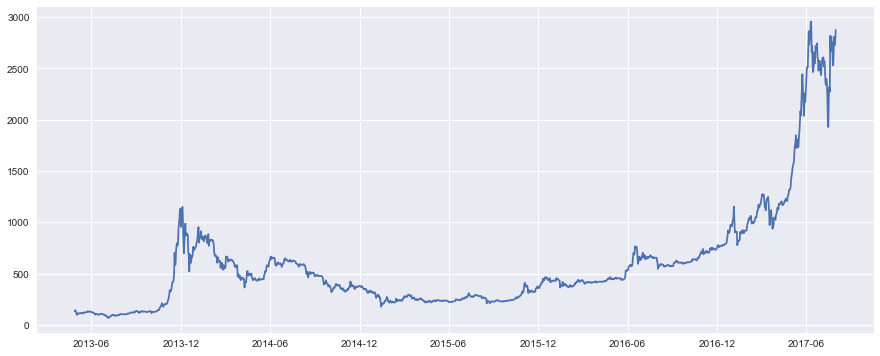

In [19]:
#plotting the time series data
plt.plot(ts)

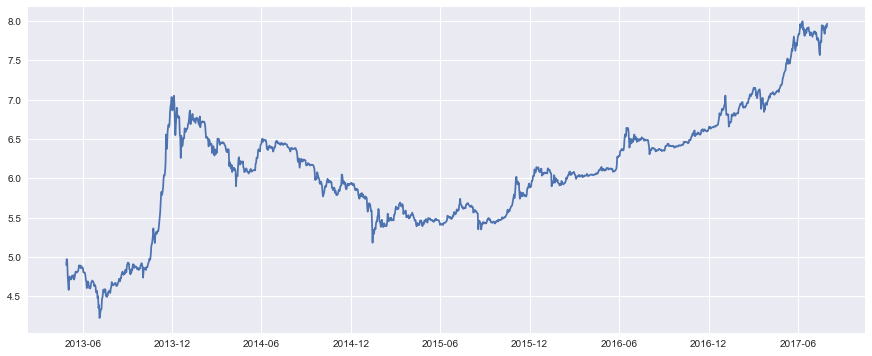

In [20]:
#transforming data - stationarizing data
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

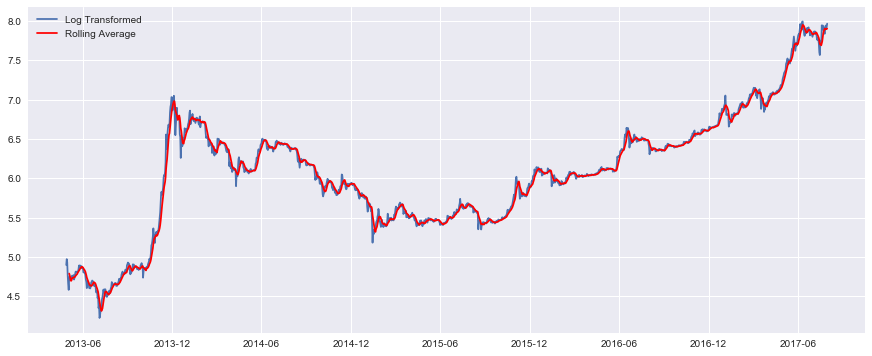

In [21]:
#smoothing by rolling average
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [22]:
log_Rolling_difference = ts_logtransformed - Rolling_average

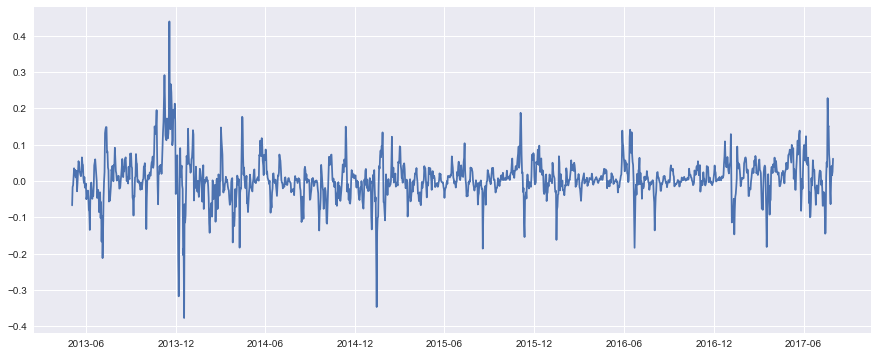

In [23]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

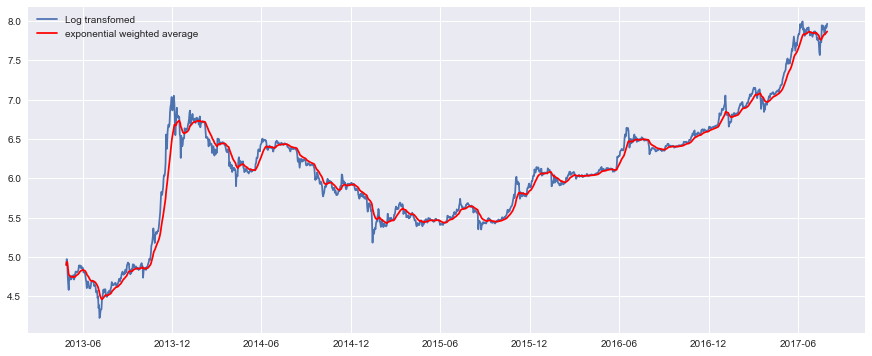

In [25]:
#exponential moving average in the place of MA for improving solution
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [27]:
log_expmovwt_diff = ts_logtransformed 

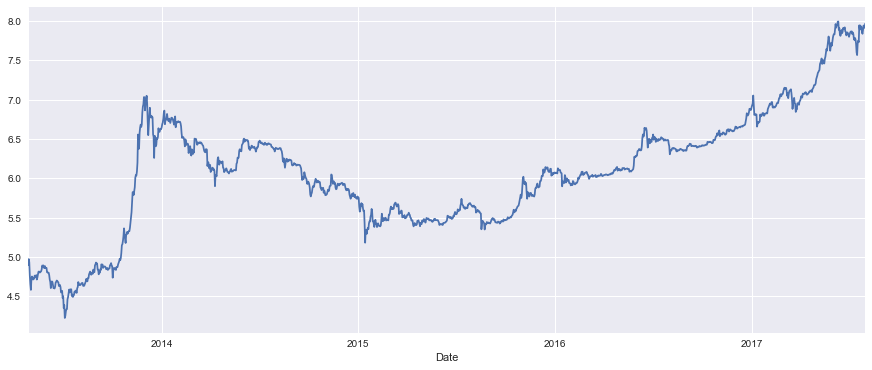

In [28]:
ts_logtransformed.plot()

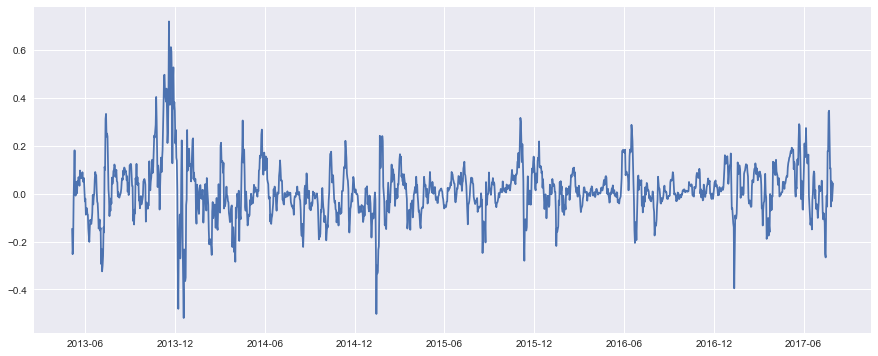

In [29]:
#seasonality adjustment
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)

In [30]:
ts_diff_logtrans.dropna(inplace=True)

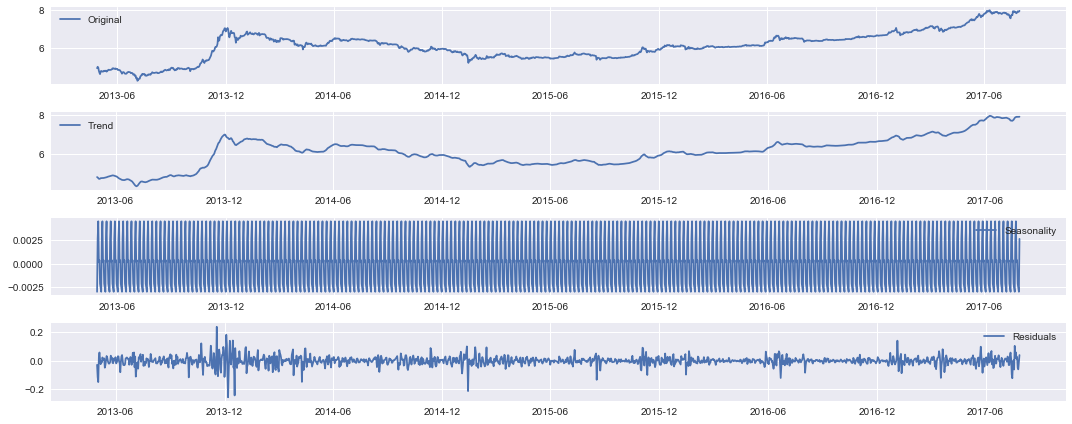

In [31]:
#decomposition
decomposition = seasonal_decompose(ts_logtransformed)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [33]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)

In [34]:
#forecasting
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

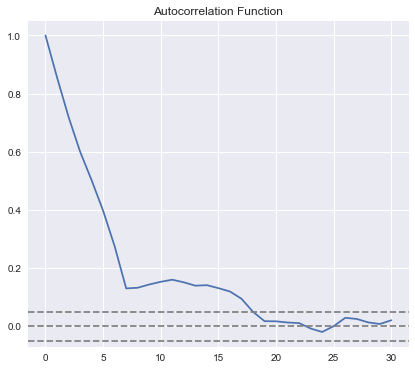

In [35]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

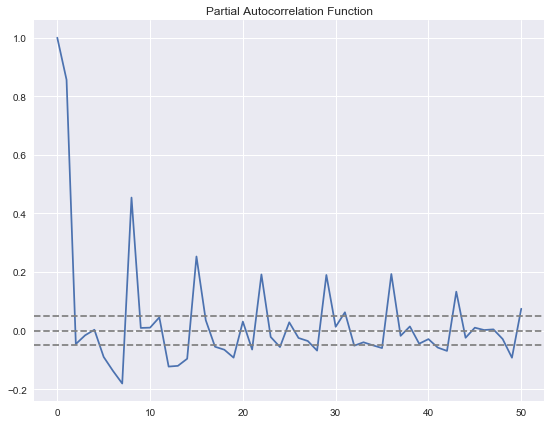

In [36]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

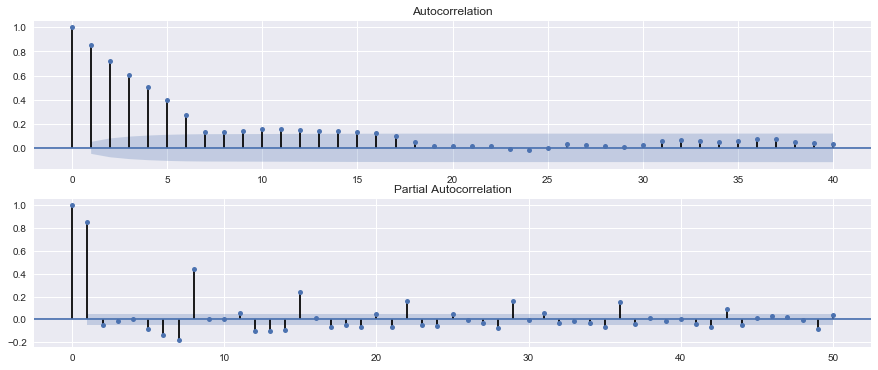

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [38]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

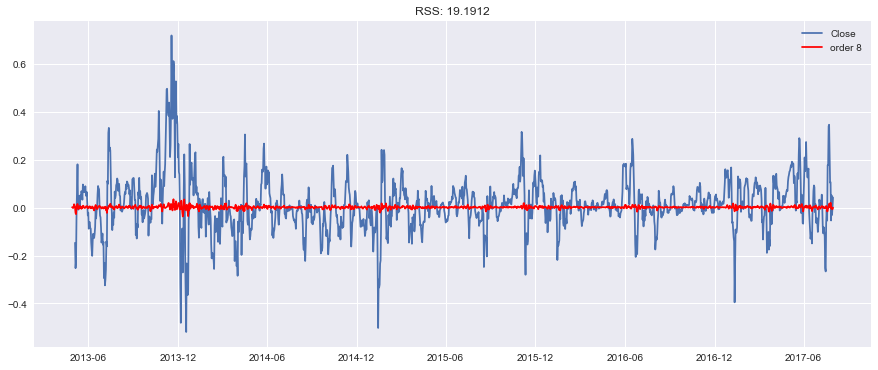

In [39]:
#AR model TRY-1
model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

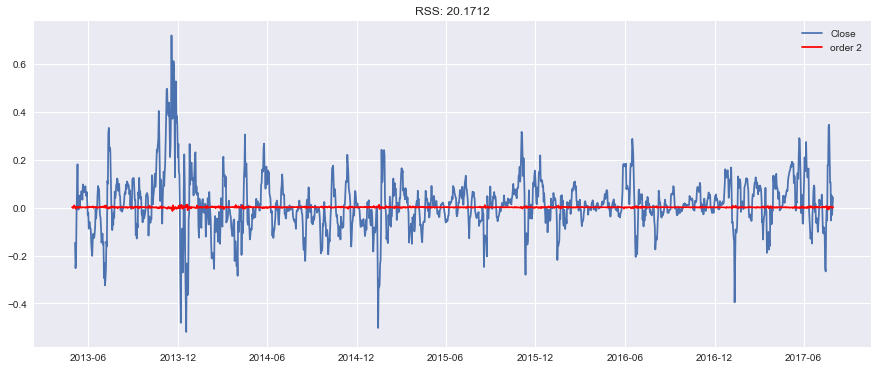

In [40]:
#AR model TRY-2
model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [41]:
#AR model summary
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 10 Dec 2017   AIC                          -5401.380
Time:                        09:16:41   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.057   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

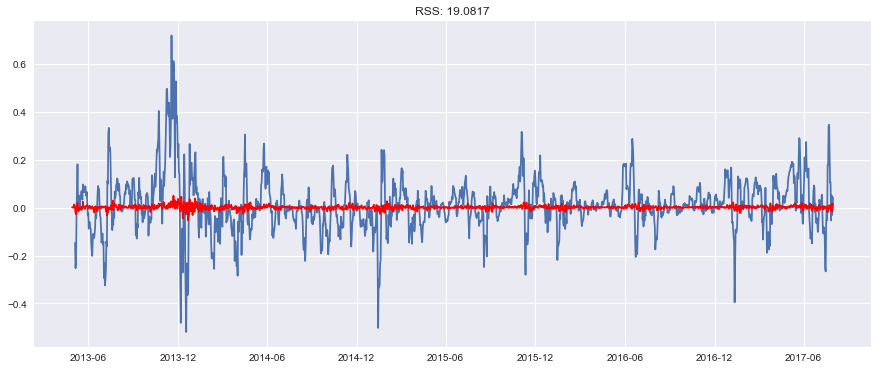

In [45]:
#MA model
model = ARIMA(ts_logtransformed, order=(0,1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [46]:
#MA model summary
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 10 Dec 2017   AIC                          -5414.646
Time:                        09:23:38   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

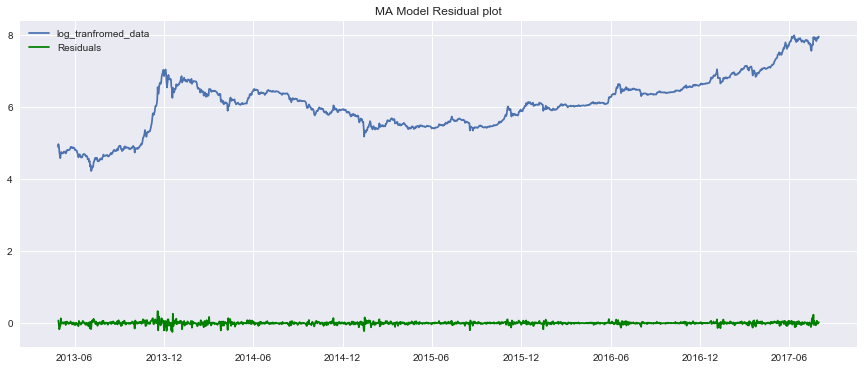

In [47]:
#MA model residual plot
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


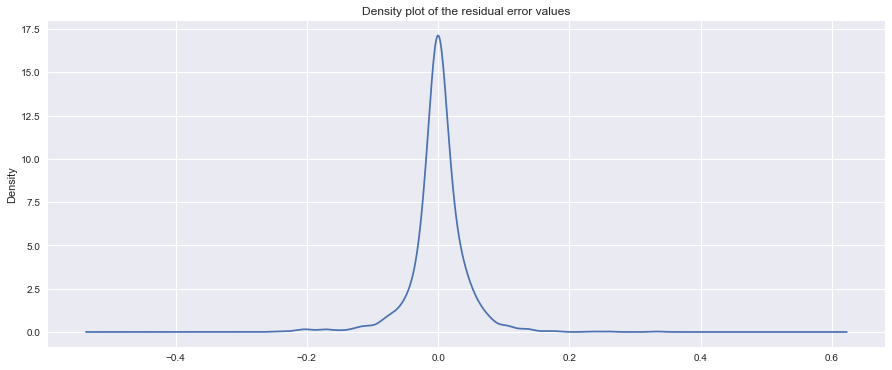

In [48]:
#density plot for residuals
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

C:\Users\meena\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\meena\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


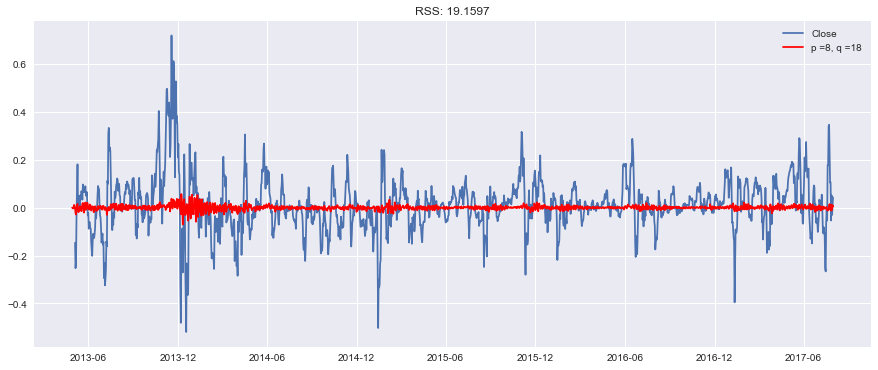

In [49]:
#Combined ARIMA
model = ARIMA(ts_logtransformed, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [50]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(8, 1, 18)   Log Likelihood                2740.109
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 10 Dec 2017   AIC                          -5426.219
Time:                        09:32:00   BIC                          -5281.790
Sample:                    04-29-2013   HQIC                         -5372.511
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close     -0.7054        nan        nan        nan         nan         nan
ar.L2.D.Close     -0.7170        nan        nan        nan         nan         nan
ar.L3.D.Close     -1.3306      0.149

C:\Users\meena\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\meena\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\meena\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\meena\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


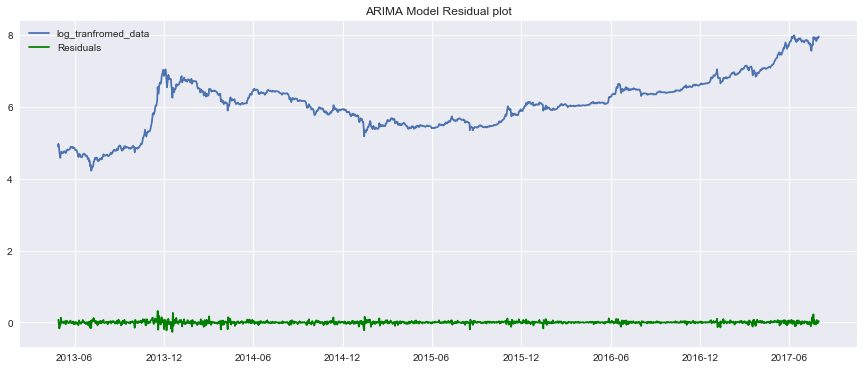

In [51]:
# AR residual plot
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

In [52]:
#test
test = pd.read_csv("bitcoin_price_1week_Test - Test.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

In [53]:
#predicting forecast using combined ARIMA
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30    0.000297
2013-05-01   -0.003259
2013-05-02   -0.000624
2013-05-03    0.011924
dtype: float64


In [54]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30    0.000297
2013-05-01   -0.002962
2013-05-02   -0.003586
2013-05-03    0.008338
dtype: float64


In [55]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899703
2013-05-01    4.896444
2013-05-02    4.895820
dtype: float64

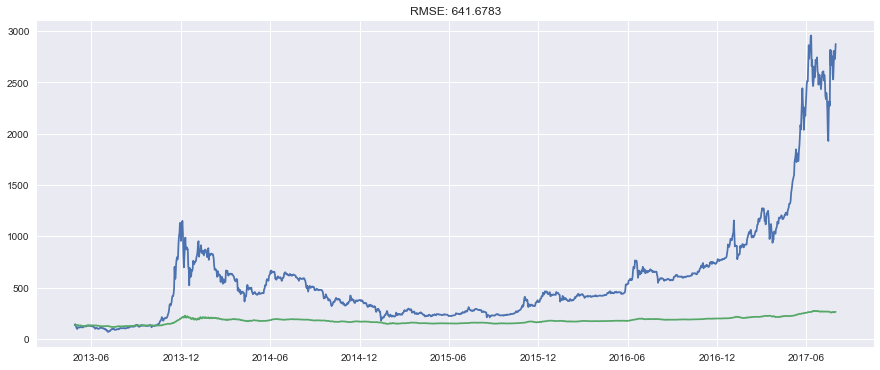

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

In [61]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2869.744896
2017-08-02    2937.217053
2017-08-03    2987.453286
2017-08-04    3015.557849
2017-08-05    2953.509082
2017-08-06    2948.061778
2017-08-07    2982.229401
dtype: float64
Test MSE: 62812.982


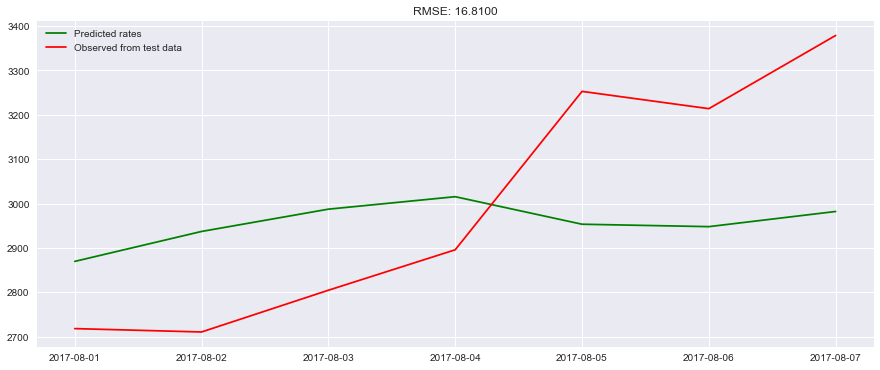

In [62]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

In [63]:
#using MA model to predict
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2013-04-29    0.001941
2013-04-30    0.001458
2013-05-01    0.000081
2013-05-02    0.002704
2013-05-03    0.013811
dtype: float64


In [64]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2013-04-29    0.001941
2013-04-30    0.003399
2013-05-01    0.003480
2013-05-02    0.006184
2013-05-03    0.019995
dtype: float64


In [65]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901347
2013-04-30    4.902805
2013-05-01    4.902885
2013-05-02    4.905590
dtype: float64

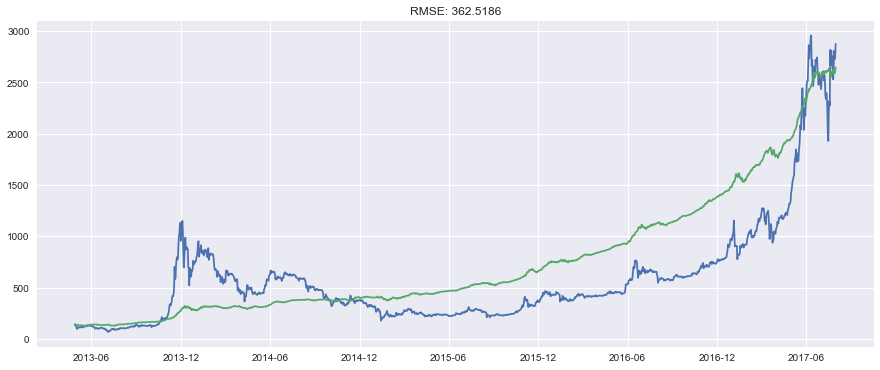

In [66]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(data)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-data)**2)/len(data)))

In [67]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2873.760769
2017-08-02    2933.263173
2017-08-03    2985.844073
2017-08-04    3001.085326
2017-08-05    2982.756234
2017-08-06    3057.338005
2017-08-07    3063.277844
dtype: float64
Test MSE: 44963.773


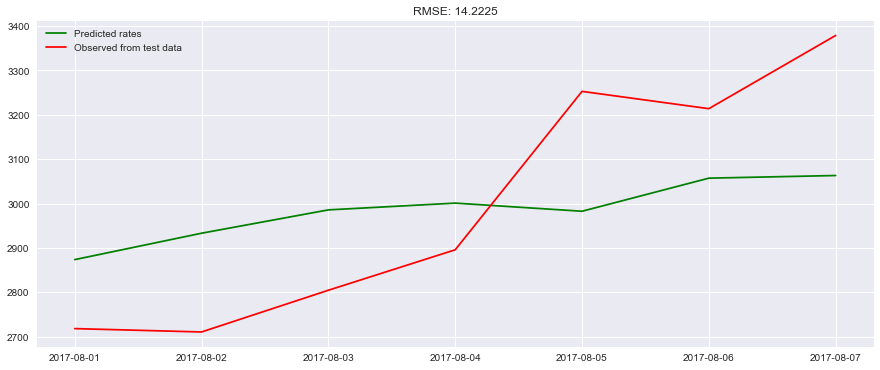

In [68]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')